In [1]:
import numpy as np          
import pandas as pd
import matplotlib.pyplot as plt          


In [2]:
data=pd.read_csv('100_students_hours_vs_result.csv')

# features must be 2D and target must be 1D
data['Result']=data['Result'].map({'Pass':1,'Fail':0})
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [3]:
# x.shape = 100,1 means that 100 samples and 1 feature
n_samples, n_features = x.shape
print(f"Number of samples: {n_samples}, Number of features: {n_features}")

Number of samples: 100, Number of features: 1


In [4]:
class logistic_regression_from_scartch:

    def __init__(self, alpha=0.1, epochs=100):
        self.alpha=alpha
        self.epochs=epochs
        self.weights=None
        self.bias=None

    def sigmoid (self, z):
        return (1/(1+np.exp(-z)))
    
    def fit(self, x,y):
        self.weights=np.zeros(n_features)
        self.bias=0

        for i in range(self.epochs):

            model=np.dot(x, self.weights)+self.bias
            y_predict=self.sigmoid(model)

            dw=(1/n_samples)*np.dot(x.T, (y_predict-y))
            db=(1/n_samples)*np.sum(y_predict-y)

            self.weights-=self.alpha*dw
            self.bias-=self.alpha*db
    def predict(self, x):
        linear_model= np.dot(x, self.weights)+self.bias
        probability=self.sigmoid(linear_model)

        return np.where(probability >= 0.5, 1, 0)
    




In [5]:
model=logistic_regression_from_scartch()
model.fit(x,y)


y_predict=model.predict(x)
accuracy = np.mean(y_predict == y)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.00%


In [6]:
# accuracy find out formulae is = correct/total number of samples

correct = np.sum(y == y_predict)
accuracy = correct / len(y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


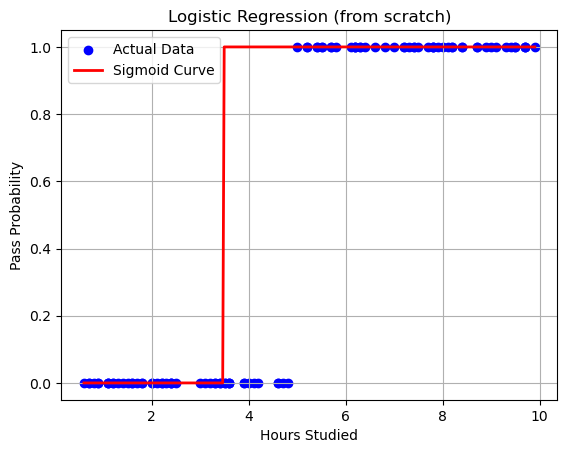

In [7]:
plt.scatter(x, y, color='blue', label='Actual Data')
x_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
y_curve = model.predict(x_range)
plt.plot(x_range, y_curve, color='red', linewidth=2, label='Sigmoid Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Pass Probability')
plt.title('Logistic Regression (from scratch)')
plt.legend()
plt.grid(True)
plt.show()